# Exercise Set 10


## Mohaddeseh Mozaffari

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
sns.set()

# Q1:

## p = λ∆t

In [99]:
l = 1
dt = 0.01
p = l*dt
N = 1000

In [100]:
s = 0
T = []
decay = []
while N > 0:
    dn = 0
    for i in range(N):
        r = np.random.random()
        if r < p:
            dn += 1

    T.append(s*dt)
    decay.append(N)
    s +=1
    N -= dn

In [101]:
T = np.array(T)

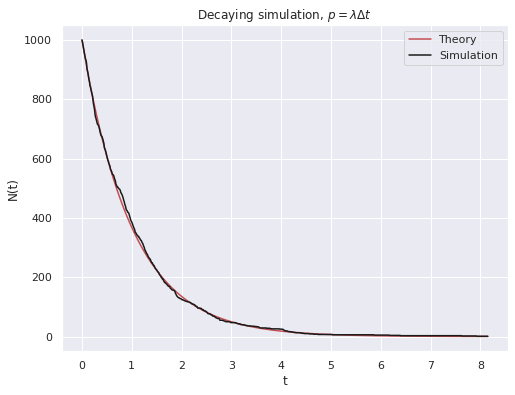

In [102]:
plt.figure(figsize=(8,6))
plt.plot(T, 1000*np.exp(-l*T), color = "r", label="Theory")
plt.plot(T, decay, color="k", label="Simulation")
plt.title(r"Decaying simulation, $p = \lambda \Delta t$")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.legend()
plt.show()

## p = λ∆t/t

In [142]:
l = 1/2
dt = 0.01
N = 1000

In [143]:
s = 1
T = []
decay = []
while N > 0:
    dn = 0
    for i in range(N):
        r = np.random.random()
        if r <= (l/s):
            dn += 1
    T.append(s*dt)
    decay.append(N)
    s +=1
    N -= dn

In [144]:
T = np.array(T)

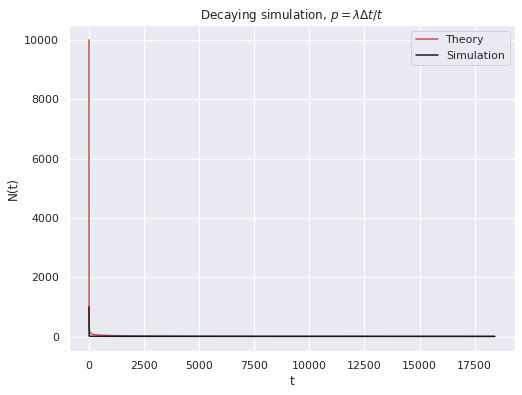

In [147]:
plt.figure(figsize=(8,6))
plt.plot(T, 1000*np.power(T, -l), color = "r", label="Theory")
plt.plot(T, decay, color="k", label="Simulation")
plt.title(r"Decaying simulation, $p = \lambda \Delta t / t$")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.legend()
plt.show()

# Q2:

In [7]:
def Pi(N):    
    fig, ax = plt.subplots(figsize=(8,8))
    s = 0
    for _ in range(N):
        x, y = np.random.random(2)
        if x**2 + y**2 < 1 :
            s +=1
            ax.scatter(x,y, color="purple")
        else:
            ax.scatter(x,y, color="pink")
    plt.title(rf"N = {N}, $\pi$ = {(4*s)/N}" )
    plt.show()

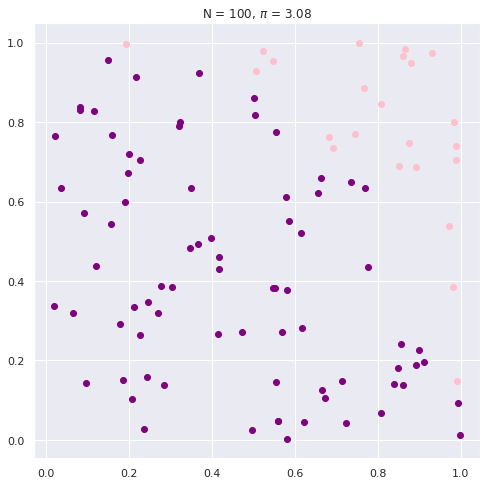

In [9]:
Pi(100)

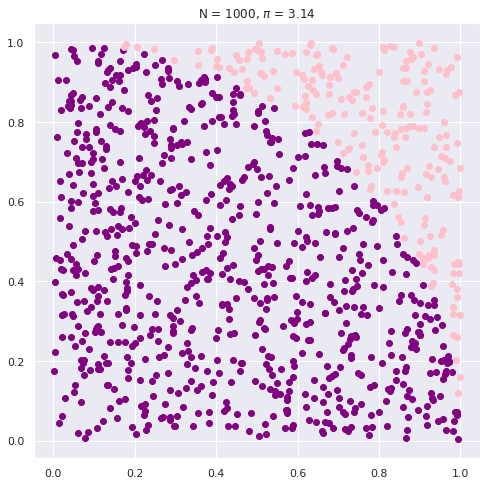

In [10]:
Pi(1000)

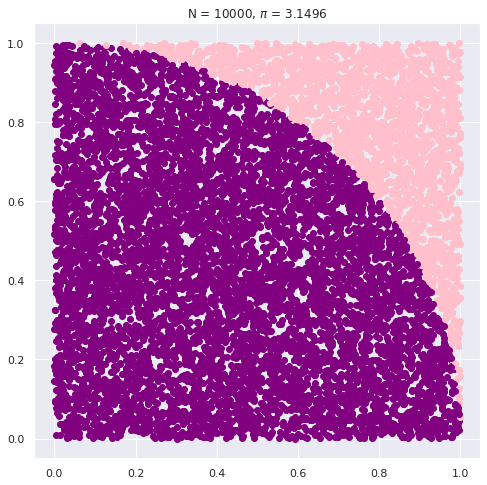

In [11]:
Pi(10000)

# Q3:

In [137]:
def P(v, beta_m=2):
    return ((beta_m /(2*np.pi))**(3/2)) * np.exp(-beta_m * v**2 / 2)

In [138]:
_min = -100
_max = 100
N = 1000000

In [139]:
z = np.random.uniform(_min, _max, N)
x  = np.random.uniform(_min, _max, N)
y  = np.random.uniform(_min, _max, N)

integral = np.sum(np.power(z, 2)* P(z))
integralx = np.sum(P(x))
integraly = np.sum(P(y))


In [140]:
mcmc_integral = (((_max - _min)**3) * integral* integralx * integraly )/ N**3 

In [141]:
print("Simulation : ", mcmc_integral)
print("Analytical : ", 1/(2*np.pi**3))

Simulation :  0.016107662140074232
Analytical :  0.016125767216599748


# Q4:

wave function is

$$ \psi \propto e^{-\lambda x^2} $$

Then the local energy of the system at each point would be

$$ E_L = \frac{H \psi}{\psi} = \lambda + x^2 (\frac{1}{2} - 2\lambda^2) $$

In [14]:
def P(x, la):
    """wave gunction

    Args:
        x (array): 
        la (float):

    Returns:
        array: e^(-la x^2)
    """
    return np.exp(-2 * la *np.power(x,2))

In [10]:
def Metropolis(N_iteration, P, la):
    """generate values for x as a function of \lambda

    Args:
        N_iteration (int): number of itreation
        P (func): the probability function
        la (float): value of lambda

    Returns:
        list: 
    """
    X = []
    x_0 = np.random.rand()
    for t in range(N_iteration):
      x_next = x_0 + np.random.uniform(-1, 1)
      w = P(x_next, la)/P(x_0, la)
      alpha = min(1, w)
      u = np.random.rand()
      if u <= alpha:
        X.append(x_next)
        x_0 = x_next
      else:
        X.append(x_0)
    return X

In [11]:
n = 100000
bins = 100
la = np.random.uniform(0,3)
Y = Metropolis(n, P, la)

In [12]:
x = np.linspace(-2,2, n)
norm = integrate.quad(lambda x : P(x,la), -np.inf,np.inf)[0]

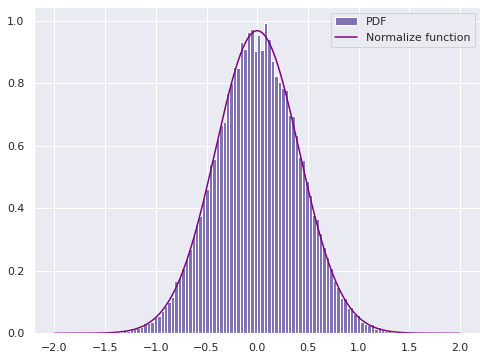

In [13]:
plt.figure(figsize= (8, 6))
plt.hist(Y, bins = bins,  density = True, label = "PDF", color="m")
np.vectorize(P(Y, la))
plt.plot(x,P(x, la)/norm, label= "Normalize function", color = 'purple')
plt.legend()
plt.show()

Then the local energy of the system at each point would be

$$ E_L = \frac{H \psi}{\psi} = \lambda + x^2 (\frac{1}{2} - 2\lambda^2) $$

In [17]:
def El(x, la):
    """calculate the local energy of system

    Args:
        x (array): 
        la (float): 

    Returns:
        array: local energy
    """
    return la + np.power(x, 2)*(0.5- 2* la**2)

In [18]:
def mean_val(x, la, El):
    """calculate the expectation value

    Args:
        x (array): 
        la (float): 
        El (func): local energy function

    Returns:
        float: the expectation value
    """
    return np.mean(El(x, la))

In [19]:
def var(x, la, El):
  """calculate the variance of energy

  Args:
      x (array): 
      la (float): 
      El (func): local energy function

  Returns:
      float: the variance of energy
  """
  return np.var(El(x, la))

In [20]:
La = np.linspace(0,3, 50)

M = []
V = []
for l in La:
  y = Metropolis(n, P, l)
  m = mean_val(y, l, El)
  v = var(y, l, El)
  M.append(m)
  V.append(v)

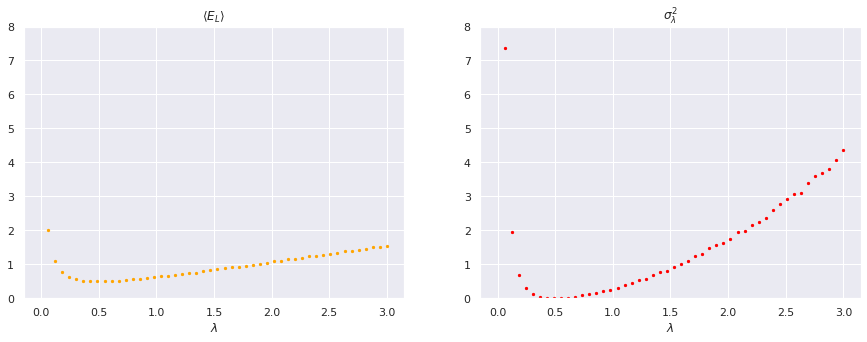

In [37]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(La, M, color="orange", s=5)
axs[0].set_ylim(0,8)
axs[0].set_xlabel(r"$\lambda$")
axs[0].set_title(r"$\langle E_L \rangle$")

axs[1].scatter(La, V, color="red", s=5)
axs[1].set_ylim(0,8)
axs[1].set_xlabel(r"$\lambda$")
axs[1].set_title(r"$\sigma^2_{\lambda}$")
plt.show()

$\lambda_{best} = 0.5$